<a href="https://colab.research.google.com/github/bhuvanpatle/MachineLearningPractice/blob/main/Lab5/lab_4_%26_5_svm_decision_tree_7_october_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Import the required modules

In [ ]:
!pip install scikit-learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve

Step 2: Load the Iris dataset

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target
classes = iris.target_names

# Convert to DataFrame for easier handling
iris_df = pd.DataFrame(data=X, columns=iris.feature_names)
iris_df['target'] = y

# Display the first few rows
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Step 2: Split the Data

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Step 3: Logistic Regression Model

Logistic Regression Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.00


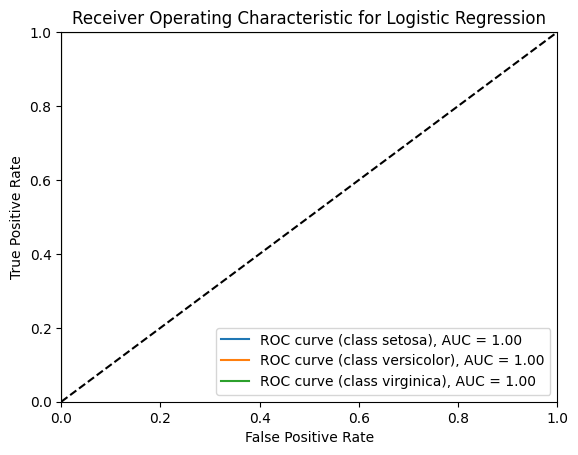

In [ ]:
# Logistic Regression Model
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

# Predictions
y_pred_log = log_reg.predict(X_test)

# Evaluation
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log, target_names=classes))

# Accuracy
accuracy_log = accuracy_score(y_test, y_pred_log)
print(f"Accuracy: {accuracy_log:.2f}")

# ROC and AUC (Binarize the output for multiclass)
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
y_pred_log_prob = log_reg.predict_proba(X_test)

# Compute ROC curve and ROC AUC
fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_log_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_pred_log_prob[:, i])

# Plot ROC curve
plt.figure()
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {classes[i]}), AUC = {roc_auc[i]:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Logistic Regression')
plt.legend(loc="lower right")
plt.show()


Step 4: SVM Model

SVM Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.00


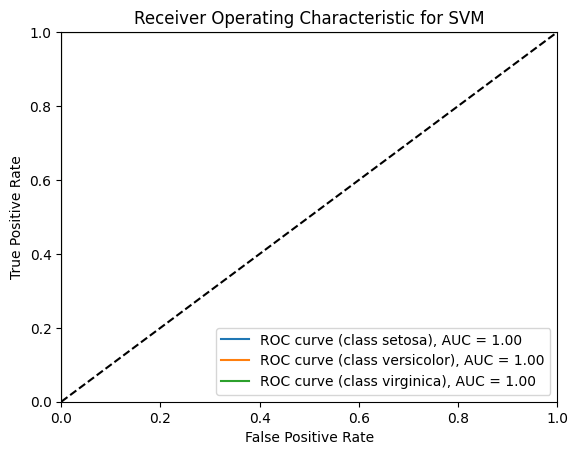

In [ ]:
# SVM Model
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluation
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm, target_names=classes))

# Accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy_svm:.2f}")

# ROC and AUC
y_pred_svm_prob = svm_model.predict_proba(X_test)

# Compute ROC curve and ROC AUC
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_svm_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_pred_svm_prob[:, i])

# Plot ROC curve
plt.figure()
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {classes[i]}), AUC = {roc_auc[i]:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for SVM')
plt.legend(loc="lower right")
plt.show()


Step 5: Decision Tree Model

Decision Tree Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.00


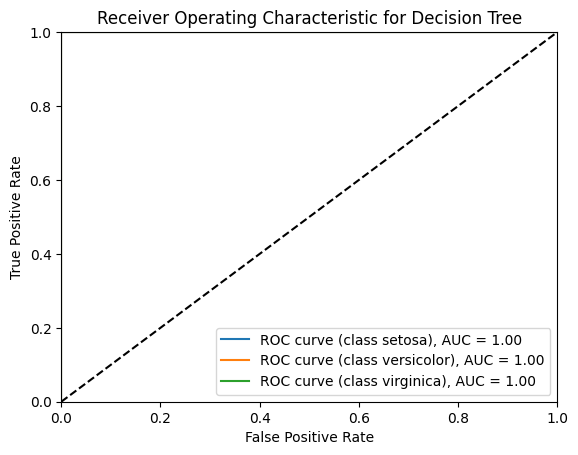

In [ ]:
# Decision Tree Model
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Predictions
y_pred_tree = tree_model.predict(X_test)

# Evaluation
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree, target_names=classes))

# Accuracy
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Accuracy: {accuracy_tree:.2f}")

# ROC and AUC
y_pred_tree_prob = tree_model.predict_proba(X_test)

# Compute ROC curve and ROC AUC
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_tree_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_pred_tree_prob[:, i])

# Plot ROC curve
plt.figure()
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {classes[i]}), AUC = {roc_auc[i]:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Decision Tree')
plt.legend(loc="lower right")
plt.show()


all three wine dataset

In [ ]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import (classification_report, confusion_matrix,
                             roc_auc_score, accuracy_score, precision_score,
                             recall_score, f1_score, roc_curve)
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Load the Wine Quality dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')

# Display the first few rows
print(data.head())

# Define features and target
X = data.drop('quality', axis=1)
y = data['quality']


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
### Step 3: Logistic Regression Model

# Logistic Regression Model
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

# Predictions
y_pred_log = log_reg.predict(X_test)

# Evaluation
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.62      0.73      0.67       130
           6       0.54      0.61      0.57       132
           7       0.32      0.14      0.20        42
           8       0.00      0.00      0.00         5

    accuracy                           0.57       320
   macro avg       0.25      0.25      0.24       320
weighted avg       0.52      0.57      0.53       320



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

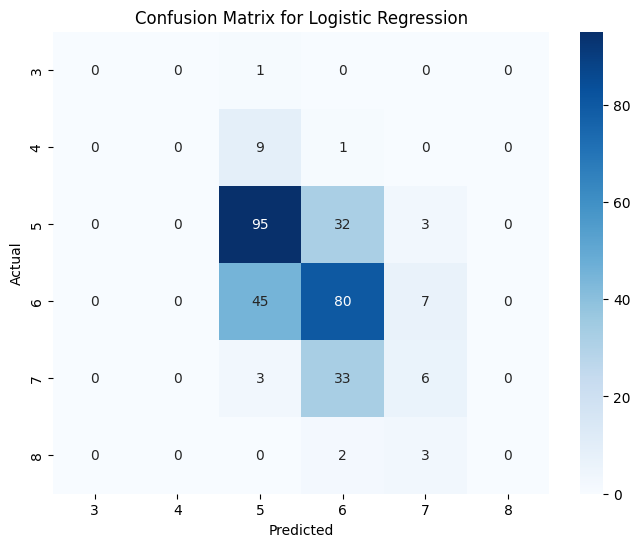

In [ ]:
# Confusion Matrix
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_log, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for Logistic Regression')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
# Additional Metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred_log):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_log, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_log, average='weighted'):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_log, average='weighted'):.2f}")

Accuracy: 0.57
Precision: 0.52
Recall: 0.57
F1 Score: 0.53


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Accuracy
accuracy_log = accuracy_score(y_test, y_pred_log)
print(f"Accuracy: {accuracy_log:.2f}")


Accuracy: 0.57


In [ ]:

# ROC and AUC (Binarize the output for multiclass)
y_test_binarized = label_binarize(y_test, classes=np.unique(y))
y_pred_log_prob = log_reg.predict_proba(X_test)


In [ ]:
# Compute ROC curve and ROC AUC
fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(np.unique(y))):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_log_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_pred_log_prob[:, i])

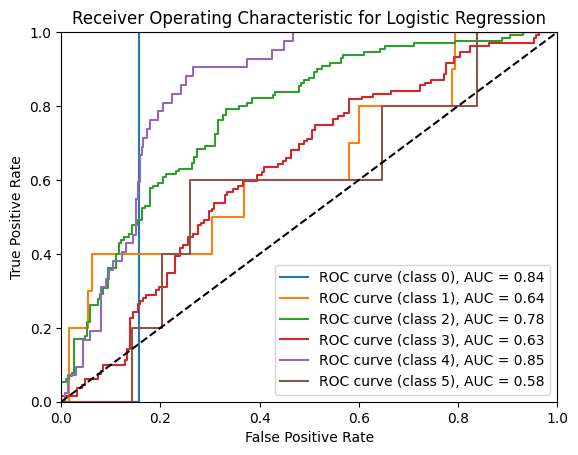

In [ ]:
# Plot ROC curve
plt.figure()
for i in range(len(np.unique(y))):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i}), AUC = {roc_auc[i]:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

In [ ]:
### Step 4: SVM Model

# SVM Model
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluation
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))


SVM Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.60      0.51      0.55       130
           6       0.46      0.73      0.56       132
           7       1.00      0.02      0.05        42
           8       0.00      0.00      0.00         5

    accuracy                           0.51       320
   macro avg       0.34      0.21      0.19       320
weighted avg       0.56      0.51      0.46       320



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


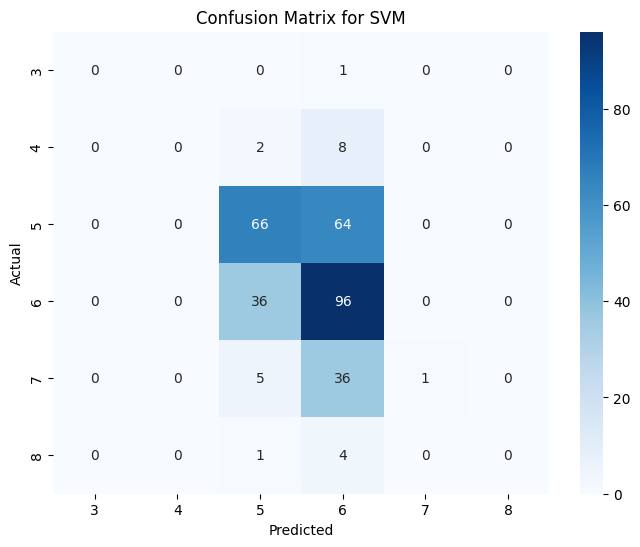

In [ ]:
# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for SVM')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [ ]:
# Additional Metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_svm, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_svm, average='weighted'):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_svm, average='weighted'):.2f}")
# Accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy_svm:.2f}")


Accuracy: 0.51
Precision: 0.56
Recall: 0.51
F1 Score: 0.46
Accuracy: 0.51


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# ROC and AUC
y_pred_svm_prob = svm_model.predict_proba(X_test)

# Compute ROC curve and ROC AUC
for i in range(len(np.unique(y))):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_svm_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_pred_svm_prob[:, i])

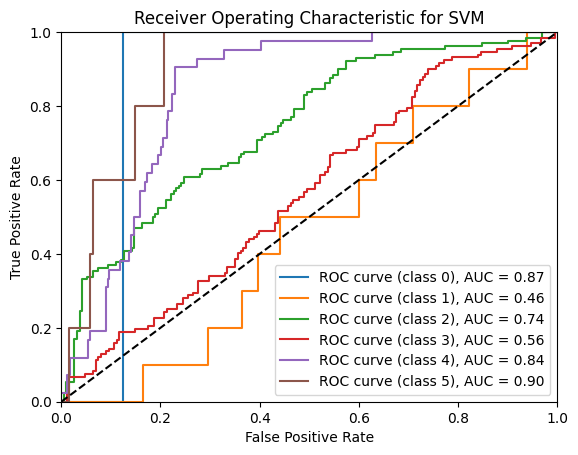

In [ ]:
# Plot ROC curve
plt.figure()
for i in range(len(np.unique(y))):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i}), AUC = {roc_auc[i]:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for SVM')
plt.legend(loc="lower right")
plt.show()

In [ ]:
### Step 5: Decision Tree Model

# Decision Tree Model
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Predictions
y_pred_tree = tree_model.predict(X_test)

# Evaluation
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))



Decision Tree Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.63      0.68      0.65       130
           6       0.58      0.55      0.57       132
           7       0.54      0.50      0.52        42
           8       0.33      0.20      0.25         5

    accuracy                           0.57       320
   macro avg       0.35      0.32      0.33       320
weighted avg       0.57      0.57      0.57       320



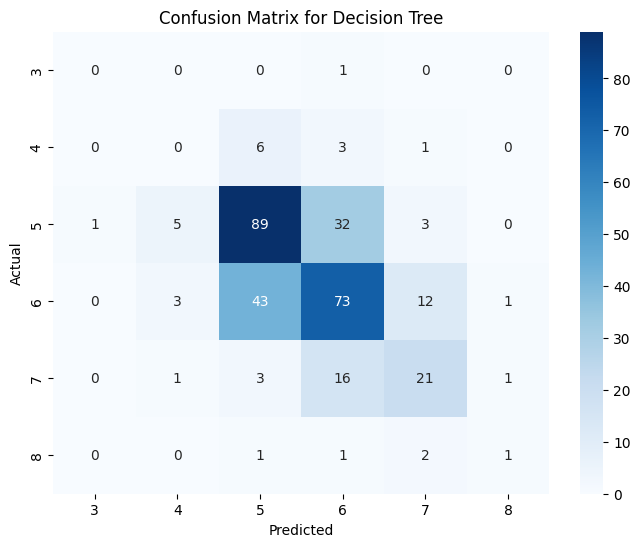

In [ ]:
# Confusion Matrix
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for Decision Tree')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()



In [ ]:
# Additional Metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_tree, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_tree, average='weighted'):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_tree, average='weighted'):.2f}")



Accuracy: 0.57
Precision: 0.57
Recall: 0.57
F1 Score: 0.57


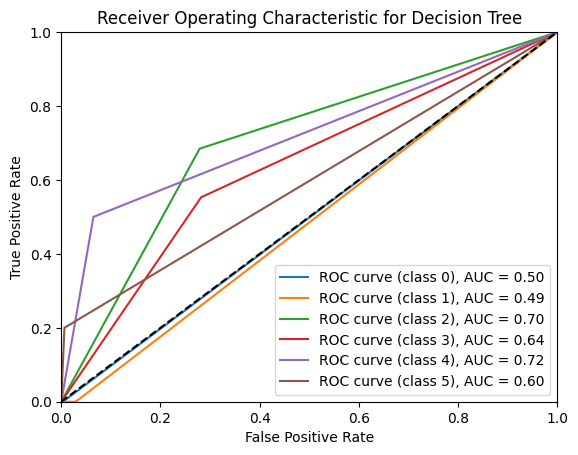

In [ ]:
# ROC and AUC
y_pred_tree_prob = tree_model.predict_proba(X_test)

# Compute ROC curve and ROC AUC
for i in range(len(np.unique(y))):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_tree_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_pred_tree_prob[:, i])

# Plot ROC curve
plt.figure()
for i in range(len(np.unique(y))):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i}), AUC = {roc_auc[i]:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Decision Tree')
plt.legend(loc="lower right")
plt.show()